# **FULL DATASET BINARY**

### **Preliminary steps**

In [1]:
import os 
print(os.getcwd())
#os.chdir('../..')
print(os.getcwd())

/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project /ml-for-nlp
/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project /ml-for-nlp


In [2]:
### PACKAGES
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import shap
from sklearn.naive_bayes import MultinomialNB

In [3]:
### FUNCTIONS
from src.libs.preprocess_dataframe_train_test import load_all_datasets
from src.pipeline.whole_pipeline import punctuation_map_dimensions_to_names, punctuation_transform, punctuation_map_dimensions_to_names, fit_tfidf_embedding, transform_with_tfidf, train_fine_tune_RF, eval_model_binary, evaluate

In [4]:
### LOAD DATA

data = load_all_datasets()

### Global X, y
X_train = data["X_train"]
y_train = (data["y_train"]>0).astype(int)
X_test = data["X_test"]
y_test = (data["y_test"]>0).astype(int)

### Global dataframes
df_train = data["df_train"]
df_test = data["df_test"]

### By type: poetry, essay, story (train)
df_train_poetry = data["df_train_poetry"]
df_train_essay = data["df_train_essay"]
df_train_story = data["df_train_story"]
X_train_poetry = data["X_train_poetry"]
y_train_poetry = (data["y_train_poetry"]>0).astype(int)
X_train_essay = data["X_train_essay"]
y_train_essay = (data["y_train_essay"]>0).astype(int)
X_train_story = data["X_train_story"]
y_train_story = (data["y_train_story"]>0).astype(int)

### By type: poetry, essay, story (test)
df_test_poetry = data["df_test_poetry"]
df_test_essay = data["df_test_essay"]
df_test_story = data["df_test_story"]
X_test_poetry = data["X_test_poetry"]
y_test_poetry = (data["y_test_poetry"]>0).astype(int)
X_test_essay = data["X_test_essay"]
y_test_essay = (data["y_test_essay"]>0).astype(int)
X_test_story = data["X_test_story"]
y_test_story = (data["y_test_story"]>0).astype(int)

Time taken to load dataset: 0.05396580696105957 seconds
Time taken to load dataset: 0.0065500736236572266 seconds
Time taken to load dataset: 0.27022314071655273 seconds
Time taken to load dataset: 0.007772207260131836 seconds
Time taken to load dataset: 0.0063190460205078125 seconds
Time taken to load dataset: 0.07378792762756348 seconds
Time taken to load dataset: 0.008804798126220703 seconds
Time taken to load dataset: 0.008481740951538086 seconds
Time taken to load dataset: 0.008781909942626953 seconds


## **CLASSIFICATION USING PUNCTUATION & RANDOM FOREST**

In [5]:
### EMBEDDING

X_train_punct = punctuation_transform(X_train)
X_test_punct = punctuation_transform(X_test)
X_test_poetry_punct = punctuation_transform(X_test_poetry)
X_test_essay_punct = punctuation_transform(X_test_essay)
X_test_story_punct = punctuation_transform(X_test_story)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 239}


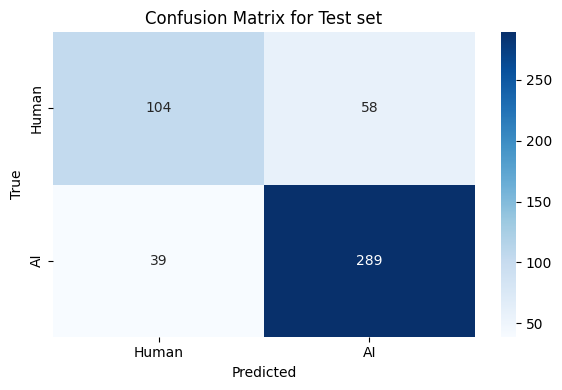

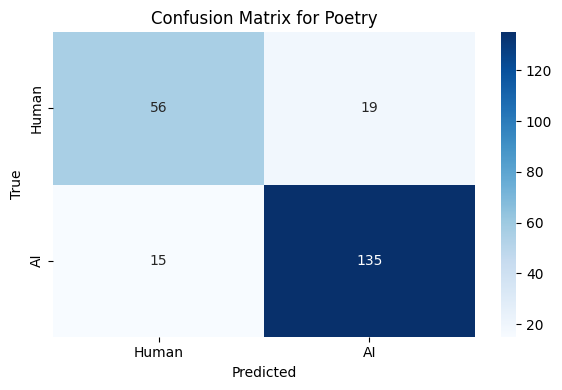

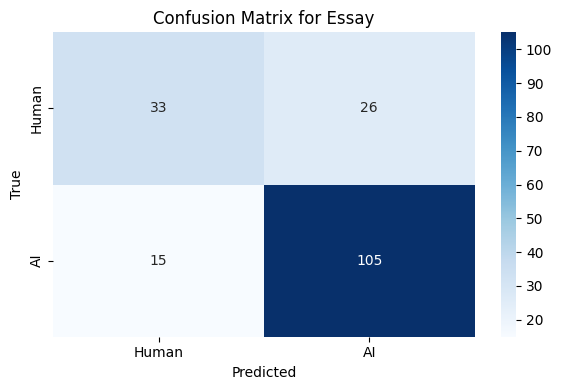

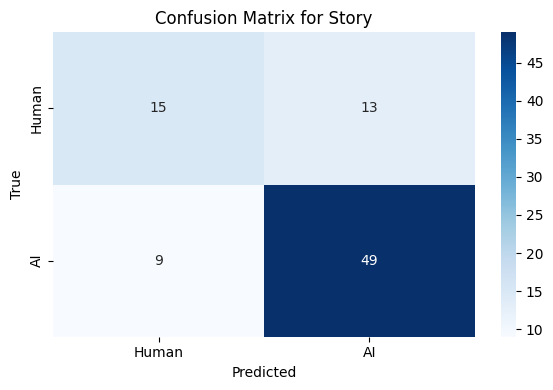

              confusion_matrix precision    recall        f1
test    [[104, 58], [39, 289]]  0.780063  0.761536  0.769132
poetry   [[56, 19], [15, 135]]  0.832678  0.823333  0.827641
essay    [[33, 26], [15, 105]]  0.744513  0.717161  0.726738
story      [[15, 13], [9, 49]]  0.707661  0.690271  0.696795


RandomForestClassifier(bootstrap=False, max_depth=14, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=239, n_jobs=-1,
                       random_state=42)

In [6]:
### CLASSIFIER


classifier_punct = train_fine_tune_RF(X_train_punct, y_train)
eval_model_binary(classifier_punct, X_train_punct, y_train, X_test_punct, y_test, X_test_poetry_punct, y_test_poetry, X_test_essay_punct, y_test_essay, X_test_story_punct, y_test_story)

In [7]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_211 = punctuation_map_dimensions_to_names()
feature_importances_211 = classifier_punct.feature_importances_

most_important_features_211 = np.argsort(feature_importances_211)[-10:][::-1]

for i in most_important_features_211:
    print(f"{dim_names_211[i]}: {feature_importances_211[i]}")


ratio_words_per_sentence: 0.39356048603298516
ratio_odd_characters: 0.32173899998517397
ratio_punctuations: 0.2847005139818408


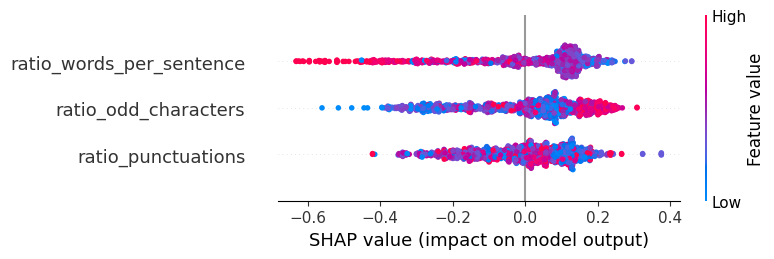

In [8]:
### INTERPRETABILITY - SHAP VALUES

explainer = shap.Explainer(classifier_punct)
X_train_dense = X_train_punct
shap_values  = explainer(X_train_dense)

shap.summary_plot(
    shap_values .values[:, :, 1], 
    features=X_train_dense,
    feature_names=dim_names_211
)

## **CLASSIFICATION USING TF-IDF & RANDOM FOREST**

In [9]:
### TF-IDF embedding
vectorizer_tfidf, X_train_tfidf = fit_tfidf_embedding(X_train, max_features=1000)

X_test_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test)
X_test_poetry_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_poetry)
X_test_essay_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_essay)
X_test_story_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_story)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 173}


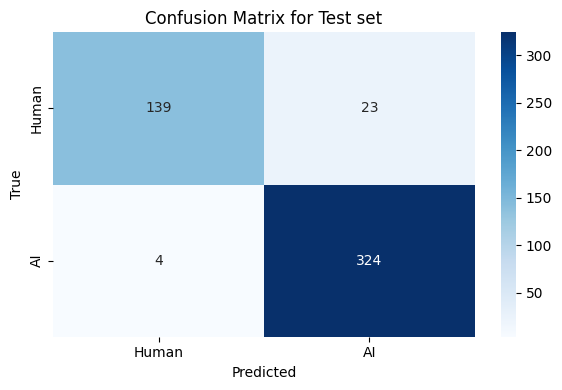

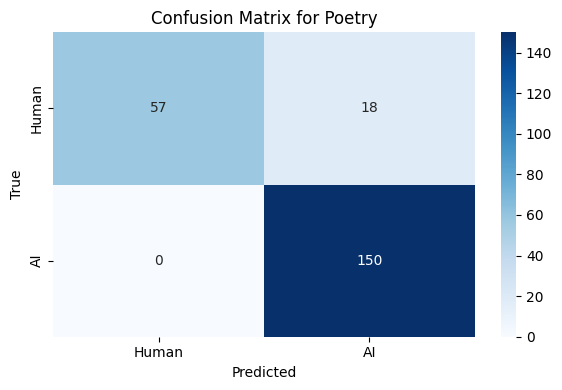

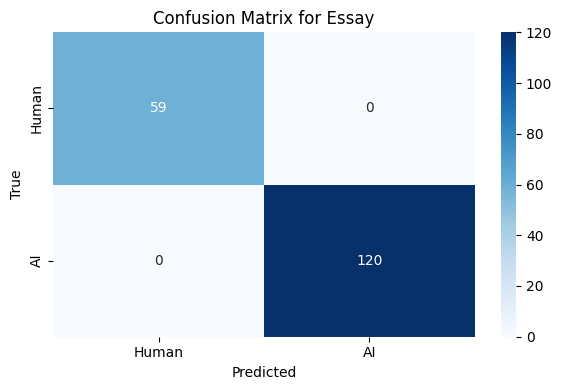

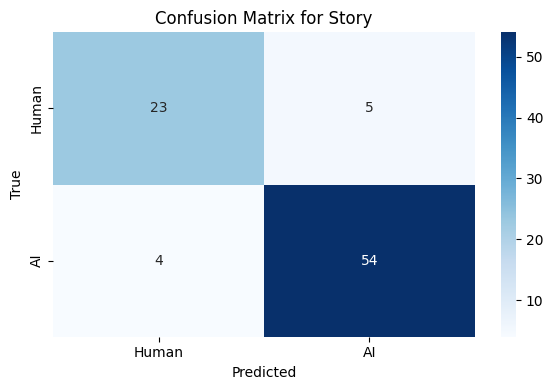

             confusion_matrix precision    recall        f1
test    [[139, 23], [4, 324]]  0.952873  0.922915  0.935738
poetry   [[57, 18], [0, 150]]  0.946429      0.88  0.903516
essay     [[59, 0], [0, 120]]       1.0       1.0       1.0
story      [[23, 5], [4, 54]]  0.883553  0.876232   0.87972


RandomForestClassifier(max_depth=18, n_estimators=173, n_jobs=-1,
                       random_state=42)

In [10]:
classifier_tfidf = train_fine_tune_RF(X_train_tfidf, y_train)
eval_model_binary(classifier_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test, X_test_poetry_tfidf, y_test_poetry, X_test_essay_tfidf, y_test_essay, X_test_story_tfidf, y_test_story)

In [11]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_tfidf = vectorizer_tfidf.get_feature_names_out()
feature_importances_tfidf = classifier_tfidf.feature_importances_
most_important_features_tfidf = np.argsort(feature_importances_tfidf)[-20:][::-1]
for i in most_important_features_tfidf:
    print(f"{dim_names_tfidf[i]}: {feature_importances_tfidf[i]:.5f}")


really: 0.03015
think: 0.02506
just: 0.02332
like: 0.02114
room: 0.01574
going: 0.01558
man: 0.01487
don: 0.01455
help: 0.01412
guess: 0.01396
mother: 0.01317
father: 0.01260
minutes: 0.01141
got: 0.01109
head: 0.00999
says: 0.00946
left: 0.00866
kind: 0.00858
body: 0.00825
lips: 0.00817


In [12]:
df_train

,text,abstract,label,type
53,"It was a typical day for Saiki Kusuo, Aiura Mi...",chatgpt writes saiki k,1,story
653,in the evening the hamster sits at the compute...,\r\r\n Maple Syrup\r\r\n ...,0,poetry
259,Sometimes I think that maybe I need to make so...,No abstract,0,essay
435,"Please raise your hand, whomever else of you h...",\r\r\n [galleon prayer]\r\r...,0,poetry
368,"I dream of victory, I dream of success Winning...",write a poem about a game you wish to win,1,poetry
...,...,...,...,...
642,"I once was lost in wilderness, With no one to ...",write a poem about a skill you learned,1,poetry
377,"The City of Dreams A city of lights, A city of...",write a poem about a city you wish to live in,2,poetry
15,As Light Yagami kissed Misa Amane's inner thig...,"""Please,"" she whispered, ""I want to feel your ...",0,story
132,"Oh, comet in the sky so bright, Your tail a tr...",write a poem about a comet you fear,1,poetry


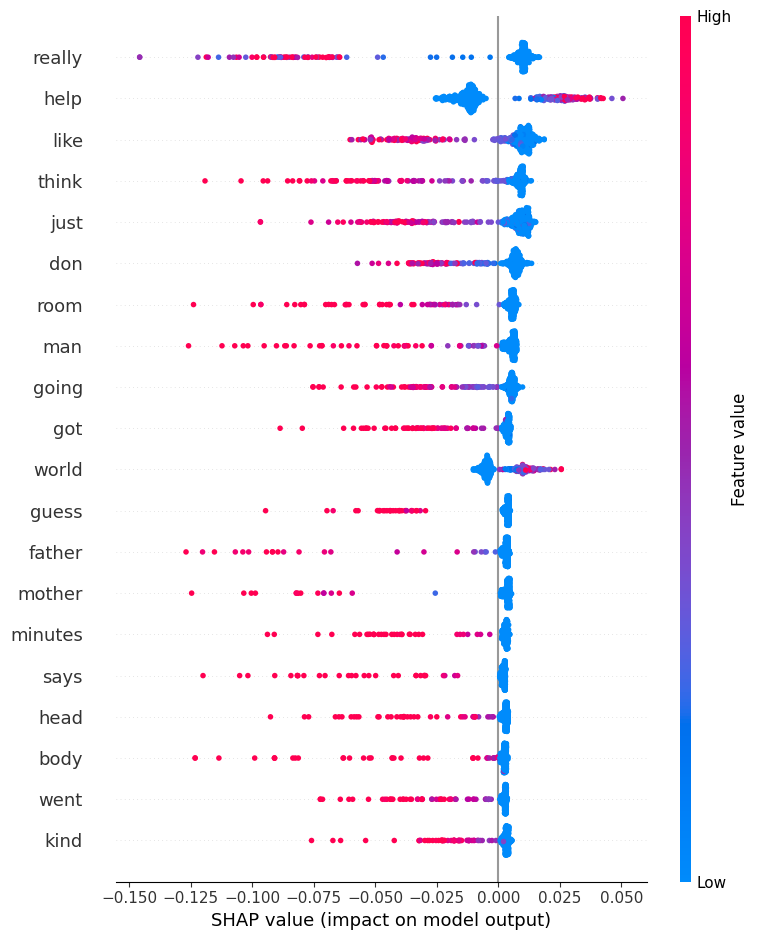

In [13]:
### INTERPRETABILITY - SHAP VALUES

X_test_tfidf_dense = X_test_tfidf.toarray()
explainer_tfidf = shap.TreeExplainer(classifier_tfidf)
shap_values_tfidf = explainer_tfidf(X_test_tfidf_dense)

shap.summary_plot(
    shap_values_tfidf[:,:,1],
    features=X_test_tfidf_dense,
    feature_names=dim_names_tfidf
)


## **CLASSIFICATION USING TF-IDF & NAIVE BAYES**

In [14]:
### TF-IDF embedding
vectorizer_tfidf, X_train_tfidf = fit_tfidf_embedding(X_train, max_features=1000)

X_test_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test)
X_test_poetry_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_poetry)
X_test_essay_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_essay)
X_test_story_tfidf = transform_with_tfidf(vectorizer_tfidf, X_test_story)

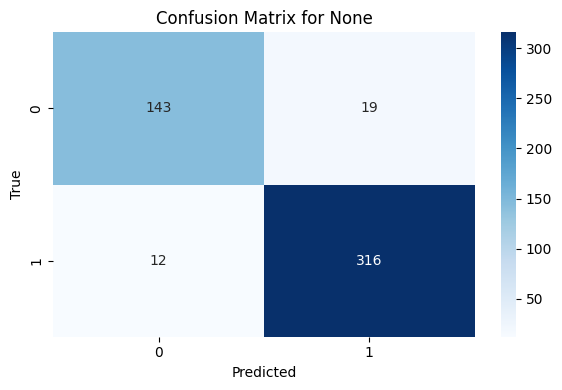

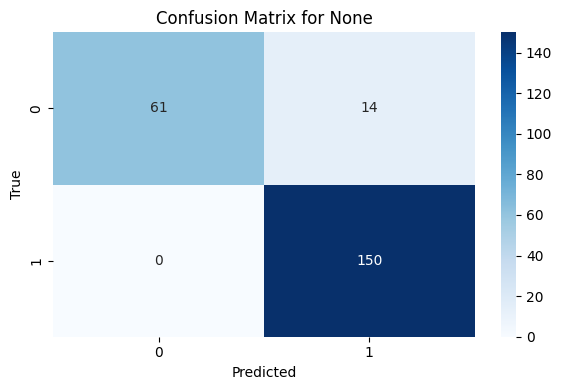

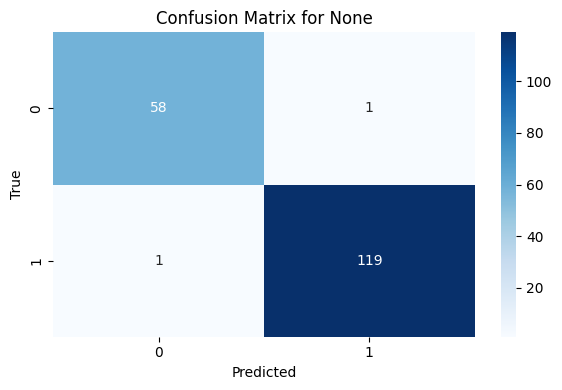

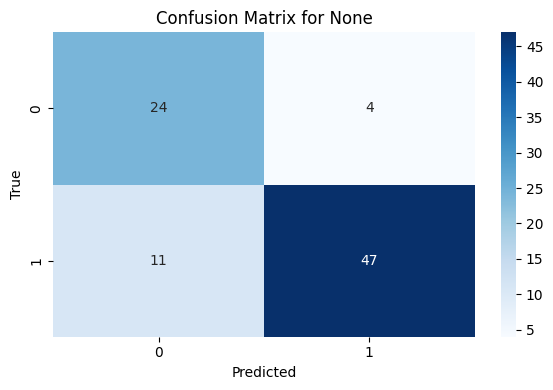

              confusion_matrix precision    recall        f1
test    [[143, 19], [12, 316]]  0.932932  0.923065  0.927726
poetry    [[61, 14], [0, 150]]  0.957317  0.906667  0.926236
essay      [[58, 1], [1, 119]]  0.987359  0.987359  0.987359
story      [[24, 4], [11, 47]]  0.803641  0.833744  0.812145


In [15]:
### CLASSIFIER

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

metrics_tfidf = evaluate(nb_classifier, X_test_tfidf, y_test)
metrics_poetry_tfidf = evaluate(nb_classifier, X_test_poetry_tfidf, y_test_poetry)
metrics_essay_tfidf = evaluate(nb_classifier, X_test_essay_tfidf, y_test_essay)
metrics_story_tfidf = evaluate(nb_classifier, X_test_story_tfidf, y_test_story)

results = {
    "test": metrics_tfidf,
    "poetry": metrics_poetry_tfidf,
    "essay": metrics_essay_tfidf,
    "story": metrics_story_tfidf
}
df_metrics = pd.DataFrame(results).T 
print(df_metrics.round(3)) 
